# PRIMERA ENTREGA DEL PROYECTO FINAL

### 1. Presentación de la empresa, organización o problema específico.


El problema que trata de resolverse en este proyecto, es como encontrar un jugador de fútbol en el mercado, que cumpla con las características necesarias para su posición teniendo en cuenta las de su sucesor. Este reemplazante tiene que poder aportar al equipo los mismos atributos que el jugador saliente, sin pasarse del presupuesto del club.

### 2. Preguntas y objetivos de la investigación.


El objetivo del proyecto es verificar si a partir de ciertos atributos podremos predicir el valor de un jugador en el mercado

### 3. Conformación del equipo de trabajo.

*   Farid Alvarez
*   Federico Carboni
*   Jeronimo Giri
*   Juan Giustina
*   Juan Tornero

### 4. Indicación de la fuente del dataset y los criterios de selección (Data Acquisition).

Nombre del dataset: FIFA22 OFFICIAL DATASET

Fuente: Kaggle

Actualización: Enero 2022

URL: https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database?select=FIFA22_official_data.csv

Este dataset cuenta con variables interesantes como valor de mercado y salario de los jugadores. Variables importantes para tener en cuenta en la búsqueda de un nuevo jugador para tu equipo.

### 5. Generación del primer Data Wrangling y EDA, apuntado a sus datos (insights) univariado, bivariado y multivariado.


In [ ]:
# Importamos librerías

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
# Lectura del dataset

df = pd.read_csv('/content/FIFA22_official_data.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


In [28]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness'],
      dtype='object')

In [ ]:
df.count()

ID                     16710
Name                   16710
Age                    16710
Photo                  16710
Nationality            16710
                       ...  
GKReflexes             16710
Best Position          16710
Best Overall Rating    16710
Release Clause         14961
DefensiveAwareness     15818
Length: 65, dtype: int64

In [ ]:
df.shape

(16710, 65)

In [31]:
df_filtrada = df[['Name', 'Age','Nationality','Overall',
       'Potential', 'Club','Value', 'Wage', 'Special','International Reputation','Skill Moves', 'Work Rate','Height', 'Weight','Best Position', 'Best Overall Rating']]
df_filtrada.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International Reputation,Skill Moves,Work Rate,Height,Weight,Best Position,Best Overall Rating
0,Bruno Fernandes,26,Portugal,88,89,Manchester United,€107.5M,€250K,2341,3,4,High/ High,179cm,69kg,CAM,88
1,L. Goretzka,26,Germany,87,88,FC Bayern München,€93M,€140K,2314,4,3,High/ Medium,189cm,82kg,CM,87
2,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,€44.5M,€135K,2307,5,3,High/ Medium,182cm,83kg,ST,88
3,K. De Bruyne,30,Belgium,91,91,Manchester City,€125.5M,€350K,2304,4,4,High/ High,181cm,70kg,CM,91
4,M. Acuña,29,Argentina,84,84,Sevilla FC,€37M,€45K,2292,2,4,High/ High,172cm,69kg,LB,84


In [40]:
for column in ('Value', 'Wage'):
  for index in range(0, len(df_filtrada[column])):
    value = str(df_filtrada[column].loc[index])

    value = value.replace('€','')

    if '.' in value:
      value = value.replace('.', '')
    if 'K' in value:
      value = value.replace('K', '000')
    if 'M' in value:
      value = value.replace('M', '000000')

    df_filtrada[column].loc[index] = int(value)

In [41]:
print(type(df_filtrada['Value'][0]))

<class 'int'>


In [48]:
df_filtrada['Value']= pd.to_numeric(df_filtrada['Value'],errors = 'coerce')
df_filtrada['Wage']= pd.to_numeric(df_filtrada['Wage'],errors = 'coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
df_filtrada.dtypes

Name                        object
Age                          int64
Nationality                 object
Overall                      int64
Potential                    int64
Club                        object
Value                        int64
Wage                         int64
Special                      int64
International Reputation     int64
Skill Moves                  int64
Work Rate                   object
Height                      object
Weight                      object
Best Position               object
Best Overall Rating          int64
dtype: object

In [ ]:
print('Valores faltantes por columna\n')
print(df_filtrada.isnull().sum())

Valores faltantes por columna

Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        264
Value                         0
Wage                          0
Special                       0
International Reputation      0
Skill Moves                   0
Work Rate                     0
Height                        0
Weight                        0
Best Position                 0
Best Overall Rating           0
dtype: int64


Se encasillara a los jugadores en posiciones generales, a partir de su posicion especifica, segun corresponda, teniendo la siguiente imagen como referencia.
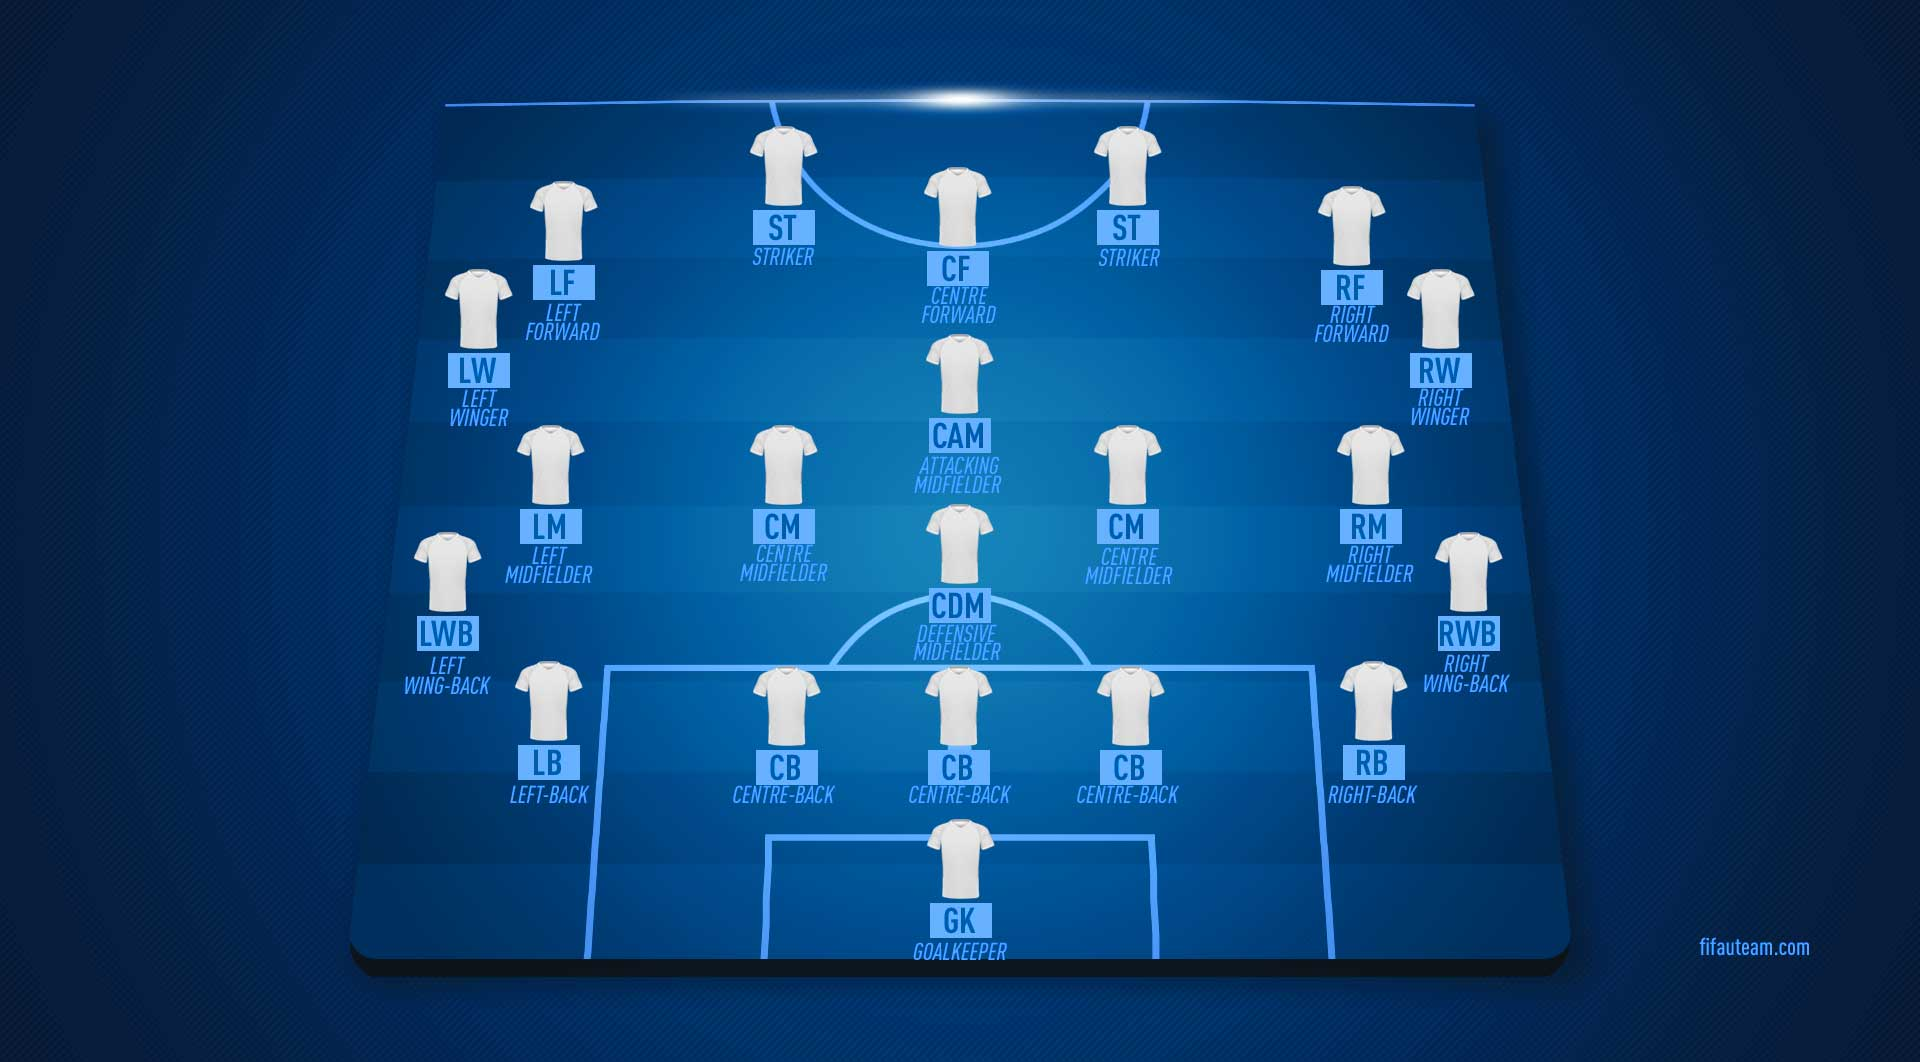



In [52]:
#se agrega una nueva columna donde se encasilla a los jugadores en posiciones generales, siendo estas Arquero, Defensor, Volante y Delantero

map_position={'CAM':'Volante','CM':'Volante', 'LB':'Defensor',  'ST':'Delantero', 'CDM':'Volante', 'CB':'Defensor', 'RB':'Defensor', 'LM':'Volante', 
              'RW':'Volante', 'LW':'Volante', 'CF':'Delantero', 'LWB':'Defensor', 'RM':'Volante','RWB':'Defensor', 'GK':'Arquero'}

df_filtrada['General Position'] = df_filtrada['Best Position'].map(map_position)

df_filtrada.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International Reputation,Skill Moves,Work Rate,Height,Weight,Best Position,Best Overall Rating,General Position
0,Bruno Fernandes,26,Portugal,88,89,Manchester United,1075000000,250000,2341,3,4,High/ High,179cm,69kg,CAM,88,Volante
1,L. Goretzka,26,Germany,87,88,FC Bayern München,93000000,140000,2314,4,3,High/ Medium,189cm,82kg,CM,87,Volante
2,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,445000000,135000,2307,5,3,High/ Medium,182cm,83kg,ST,88,Delantero
3,K. De Bruyne,30,Belgium,91,91,Manchester City,1255000000,350000,2304,4,4,High/ High,181cm,70kg,CM,91,Volante
4,M. Acuña,29,Argentina,84,84,Sevilla FC,37000000,45000,2292,2,4,High/ High,172cm,69kg,LB,84,Defensor


### 6. Análisis de componentes principales.

In [55]:
# se selecciona la variable Wage, que describe el salario jugador
# se realiza un describe para ver el comportamiento de la variable
df_filtrada.Wage.describe()

count     16710.000000
mean      11338.925793
std       21309.539618
min           0.000000
25%        2000.000000
50%        4000.000000
75%       12000.000000
max      350000.000000
Name: Wage, dtype: float64

In [ ]:
# se selecciona la variable Overall, que asigna un valor total al jugador
# se realiza un describe para ver el comportamiento de la variable
df_filtrada.Overall.describe()

count    16710.000000
mean        67.646320
std          6.457695
min         28.000000
25%         63.000000
50%         68.000000
75%         72.000000
max         93.000000
Name: Overall, dtype: float64

Text(0.5, 1.0, 'Distribucion de los datos de Overall')

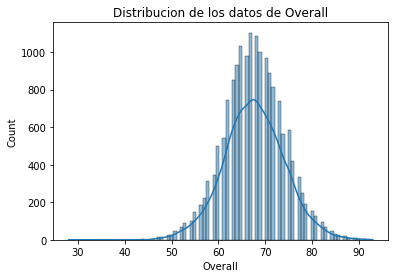

In [ ]:
sns.histplot(data = df_filtrada, x='Overall', kde=True)
plt.title('Distribucion de los datos de Overall')

Text(0.5, 1.0, 'Boxplot de los datos de Overall')

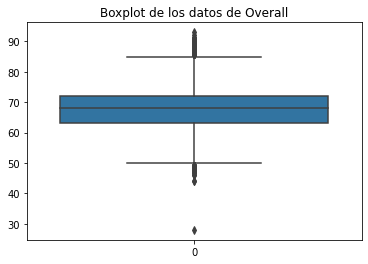

In [ ]:
# realizamos un boxplot para observar si hay datos outliers 
sns.boxplot(data=df_filtrada.Overall, orient="v")
plt.title('Boxplot de los datos de Overall')

Text(0.5, 1.0, 'Cantidad de jugadores por posicion')

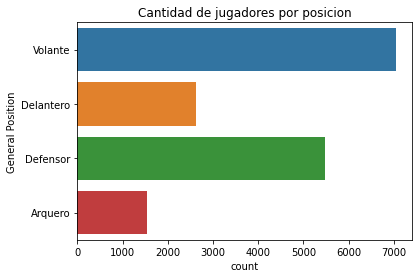

In [ ]:
# analizamos la variable categorica de posicion general
sns.countplot(data=df_filtrada,y='General Position')
plt.show
plt.title('Cantidad de jugadores por posicion')

In [ ]:
# Describe de la columna 'AGE'

df_filtrada['Age'].describe()

count    16710.000000
mean        25.727409
std          5.048910
min         16.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         54.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Distribucion de los datos de edad')

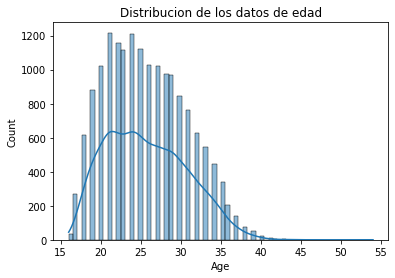

In [ ]:
# histograma de la variable AGE

sns.histplot(data = df_filtrada, x='Age', kde=True)
plt.title('Distribucion de los datos de edad')

Text(0.5, 1.0, 'Boxplot de los datos de edad')

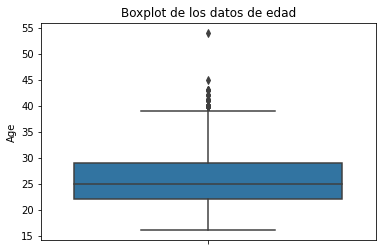

In [ ]:
# box plot de la variable AGE

sns.boxplot(y = df_filtrada['Age'])
plt.title('Boxplot de los datos de edad')

### 7. Contar la historia de sus datos

Entre todos los atributos con los que contamos, pasaremos a verificar si se observa relacion entre la valoracion total del jugador y su correspondiente valor de mercado

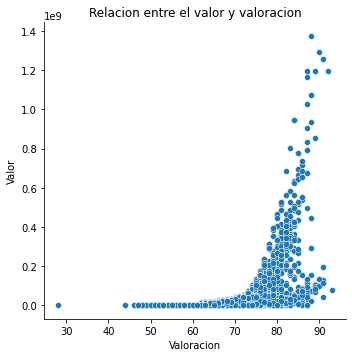

In [82]:
g = sns.FacetGrid(df_filtrada, height = 5, aspect=1)
g.map(sns.scatterplot, 'Overall', 'Value')
plt.title('Relacion entre el valor y valoracion')
plt.xlabel('Valoracion')
plt.ylabel('Valor')
plt.show()

Ahora, si ademas lo visualizamos por posicion:

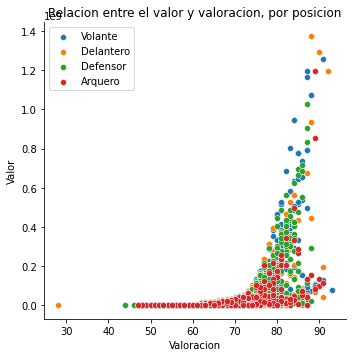

In [91]:
g = sns.FacetGrid(df_filtrada, hue='General Position', height = 5, aspect=1)
g.map(sns.scatterplot, 'Overall', 'Value')
plt.title('Relacion entre el valor y valoracion, por posicion')
plt.xlabel('Valoracion')
plt.ylabel('Valor')
plt.legend()
plt.show()

Se puede ver que entre todas las posiciones, la del arquero es la menos valorizada del mercado, mientras que la del volante y delantero las mas valorizadas.

Despues nos preguntamos si el valor de mercado estara relacionado con el potencial con el cual se lo valora al jugador

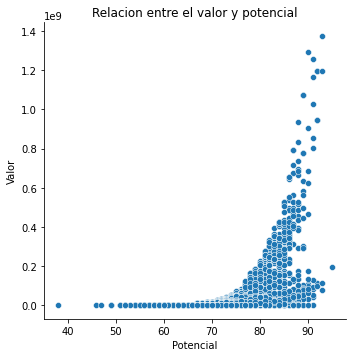

In [85]:
g = sns.FacetGrid(df_filtrada, height = 5, aspect=1)
g.map(sns.scatterplot, 'Potential', 'Value')
plt.title('Relacion entre el valor y potencial')
plt.xlabel('Potencial')
plt.ylabel('Valor')
plt.show()

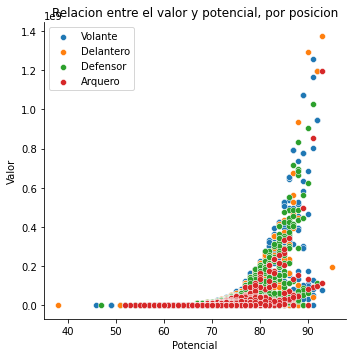

In [90]:
g = sns.FacetGrid(df_filtrada, hue='General Position', height = 5, aspect=1)
g.map(sns.scatterplot, 'Potential', 'Value')
plt.title('Relacion entre el valor y potencial, por posicion')
plt.xlabel('Potencial')
plt.ylabel('Valor')
plt.legend()
plt.show()

La relacion observable es muy parecida a la de la valoracion del jugador.

Otra variable a la hora de considerar el valor del jugador es su reputacion internacional. Al ser mas reconocido en el mundo, el jugador pasa a valer mas?


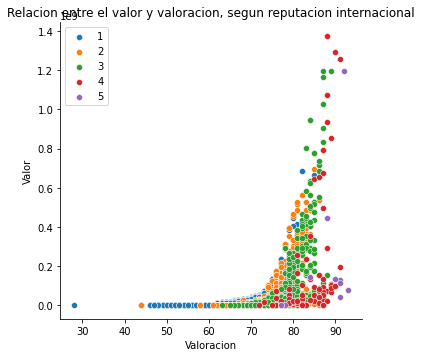

In [89]:
g = sns.FacetGrid(df_filtrada, hue='International Reputation', height = 5, aspect=1)
g.map(sns.scatterplot, 'Overall', 'Value')
plt.title('Relacion entre el valor y valoracion, segun reputacion internacional')
plt.xlabel('Valoracion')
plt.ylabel('Valor')
plt.legend()
plt.show()

Por ultimo, verificamos si el jugador a medida que mas valorizado esta en el mercado, mayor salario tiene.

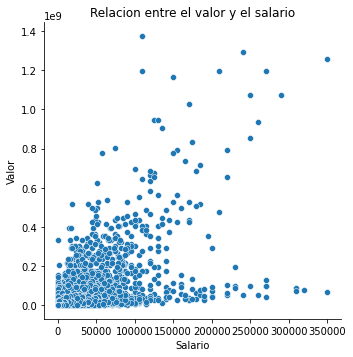

In [92]:
g = sns.FacetGrid(df_filtrada, height = 5, aspect=1)
g.map(sns.scatterplot, 'Wage', 'Value')
plt.title('Relacion entre el valor y el salario')
plt.xlabel('Salario')
plt.ylabel('Valor')
plt.show()

### 8. Filtros aplicados a los datos. Distribución. Dataset final para analizar.

Ademas de los datos analizados previamente, consideramos que vamos a tener que tener en cuenta otros atributos para poder predecir el valor de mercado de un jugador.

Por lo tanto crearemos otra variable con esos atributos

In [93]:
df_atributos = df[["Age","Overall","Potential","Skill Moves","Crossing","Finishing","Dribbling","Acceleration","Agility","Reactions","Vision","Stamina","SprintSpeed","International Reputation","DefensiveAwareness","Best Overall Rating"]]
df_atributos.head()

,Age,Overall,Potential,Skill Moves,Crossing,Finishing,Dribbling,Acceleration,Agility,Reactions,Vision,Stamina,SprintSpeed,International Reputation,DefensiveAwareness,Best Overall Rating
0,26,88,89,4,87,83,83,77,80.0,91,90.0,91,73,3,72.0,88
1,26,87,88,3,75,82,84,78,76.0,88,84.0,88,83,4,74.0,87
2,34,88,88,3,80,93,83,76,75.0,92,84.0,78,69,5,42.0,88
3,30,91,91,4,94,82,88,76,79.0,91,94.0,89,76,4,68.0,91
4,29,84,84,4,87,66,87,77,83.0,83,82.0,90,76,2,80.0,84


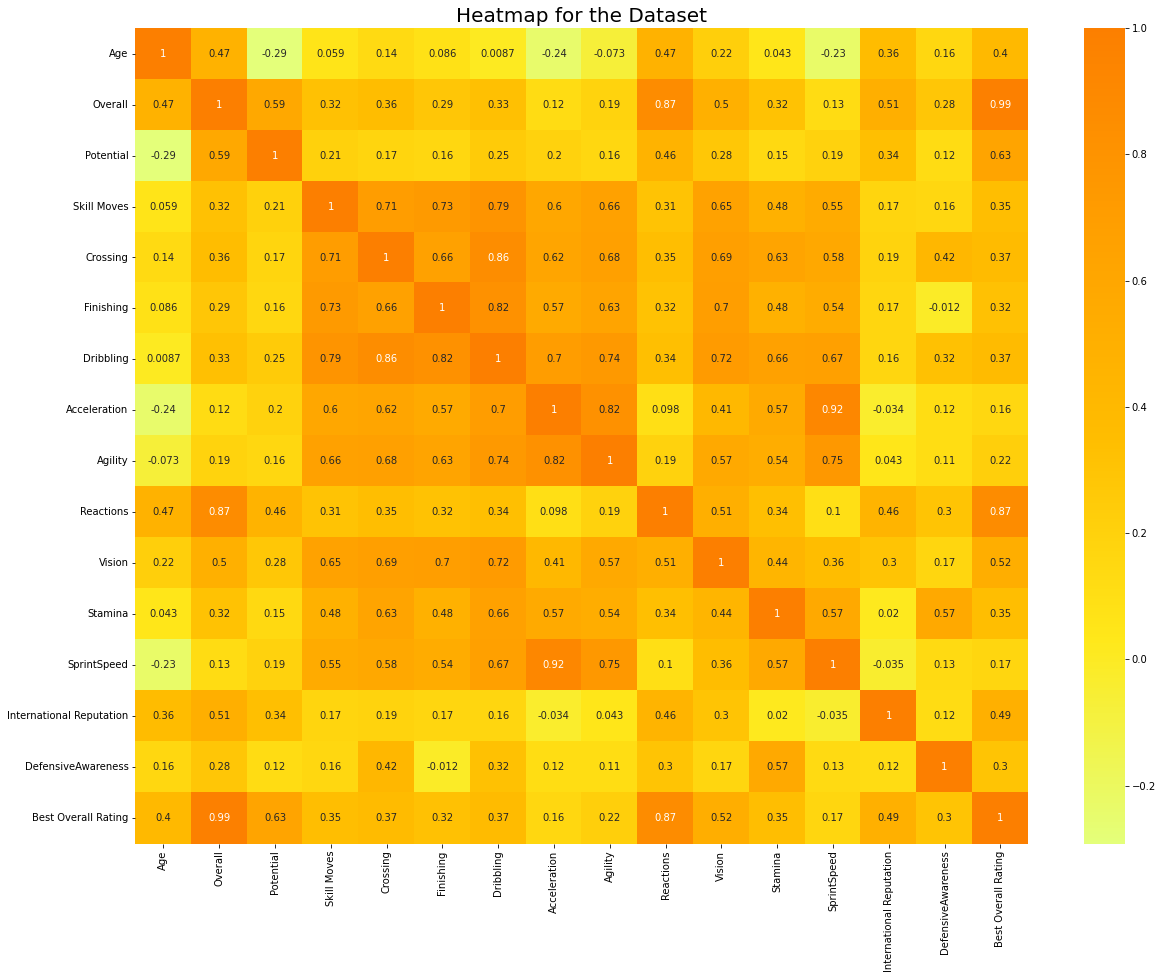

In [94]:
plt.rcParams['figure.figsize'] = (20, 15)

sns.heatmap(df_atributos.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

### 9. Plantear objetivo/s para esos datos.

En el futuro deberemos revisar en profundidad los distintos atributos que hacen a un jugador, mas alla de su valor total y potencial, para poder asignar un valor de mercado.

Por lo tanto, tendremos que analizar su relacion con el valor total de los jugadores.